# Sales Analysis

In [90]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Task 1: Merging 12 months of sales data into a single CSV file

In [65]:

files = [file for file in os.listdir(r"C:\Users\Pankaj Yadav\OneDrive\Desktop\Sales Analysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\Pankaj Yadav\OneDrive\Desktop\Sales Analysis\Sales_Data\\" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv(r"C:\Users\Pankaj Yadav\OneDrive\Desktop\Sales Analysis\all_data.csv", index = False)


### Read in updated DataFrame

In [66]:
all_data = pd.read_csv(r"C:\Users\Pankaj Yadav\OneDrive\Desktop\Sales Analysis\Output\all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data!

### Drop rows of NaN

In [67]:
NaN_df = all_data[all_data.isna().any(axis=1)]
NaN_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it

In [68]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#### Check for the datatypes 

In [87]:
all_data.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
dtype: object

#### Convert columns to the correct datatypes

In [81]:
all_data['Order ID'] = all_data['Order ID'].astype(int)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format="%m/%d/%Y %H:%M")

## Augment data with additional columns

### Task 2: Add Month Columns

In [77]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Task 3: Add a Sales Column

In [84]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [85]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Task 3: Add a City Column

In [106]:
# Let's use .apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month?

In [95]:
result = all_data.groupby('Month').sum(numeric_only=True)
result

,Order ID,Quantity Ordered,Price Each,Sales
Month,,,,
1,1421630798,10903,1811768.38,1822256.73
2,1871052592,13449,2188884.72,2202022.42
3,2564810956,17005,2791207.83,2807100.38
4,3387347100,20558,3367671.02,3390670.24
5,3345871523,18667,3135125.13,3152606.75
6,2932976072,15253,2562025.61,2577802.26
7,3284139576,16072,2632539.56,2647775.76
8,2899373917,13448,2230345.42,2244467.88
9,2948726831,13109,2084992.09,2097560.13


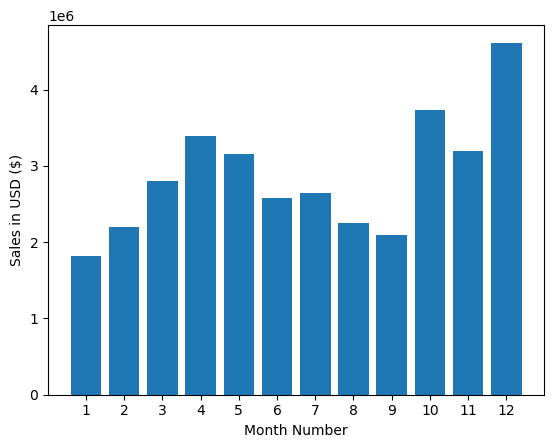

In [99]:
Months = range(1,13)
plt.bar(Months, result['Sales'])
plt.xticks(Months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### Question 2: What city had the highest number of Sales?

In [108]:
result = all_data.groupby('City').sum(numeric_only=True)
result

,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),3423838407,16602,2779908.20,104794,2795498.58
Austin (TX),2280982185,11153,1809873.61,69829,1819581.75
Boston (MA),4598265261,22528,3637409.77,141112,3661642.01
Dallas (TX),3415643578,16730,2752627.82,104620,2767975.40
Los Angeles (CA),6811084693,33289,5421435.23,208325,5452570.80
New York City (NY),5736333884,27932,4635370.83,175741,4664317.43
Portland (ME),563266345,2750,447189.25,17144,449758.27
Portland (OR),2305594747,11303,1860558.22,70621,1870732.34
San Francisco (CA),10304443952,50239,8211461.74,315520,8262203.91


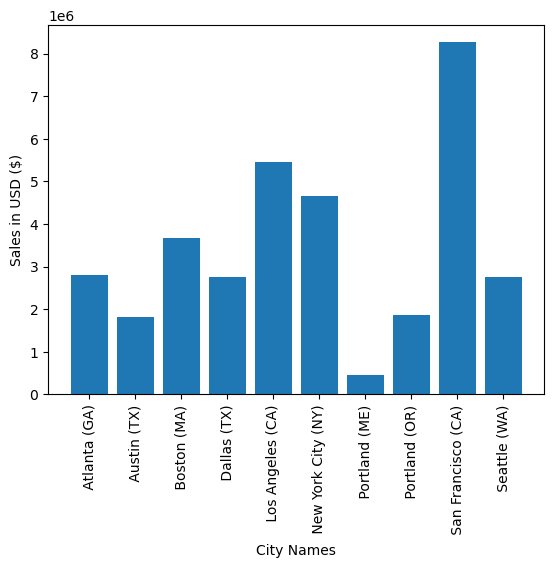

In [116]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, result['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Names')
plt.show()

### Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [118]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


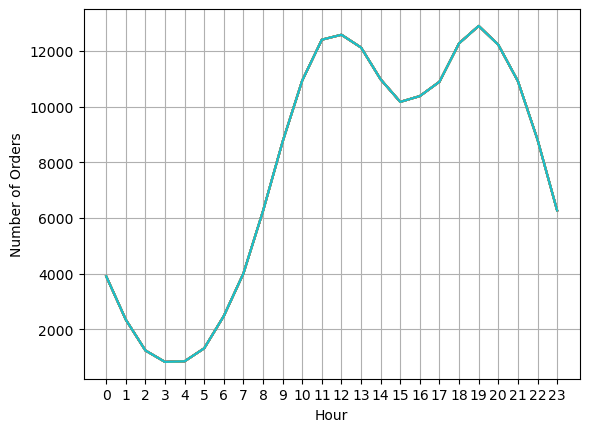

In [125]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

### Question 4: What products are most often sold together?

In [131]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\Pankaj Yadav\AppData\Local\Temp\ipykernel_6808\4061286189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [135]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

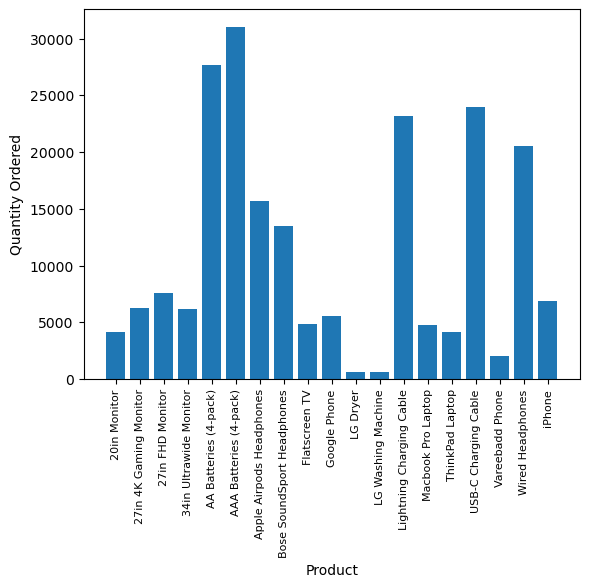

In [148]:
product_grouped = all_data.groupby('Product')
quantity_ordered = product_grouped.sum(numeric_only=True)['Quantity Ordered']

products = [product for product, df in product_grouped]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

C:\Users\Pankaj Yadav\AppData\Local\Temp\ipykernel_6808\4077158878.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


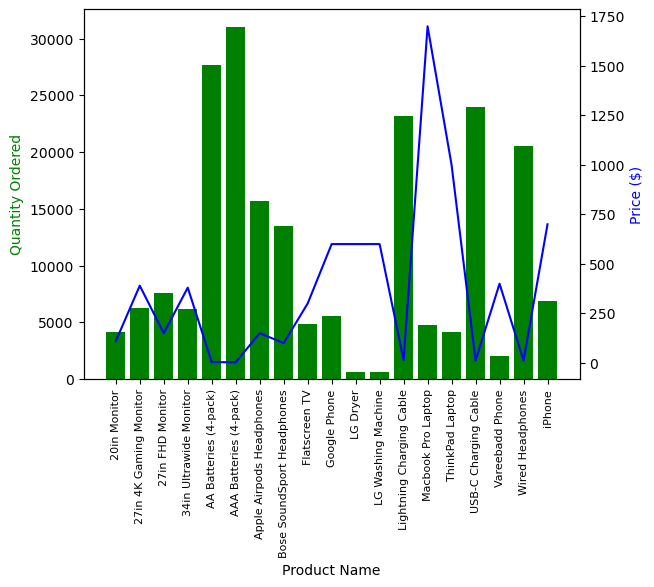

In [172]:
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()